# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
sys.path.append(os.getcwd() + '/refi')
import retirement_analysis as ra
import utils.constants
import utils.loaders
import portfolio as pf

import series.base_series as base_series
from series.consumption import StaticRetirementConsumption
from series.ssb import StaticRetirementSSB
from series.deferral import StaticPreRetirementDeferral

# Constants

In [17]:
initial_balance = 400000

initial_age = 30
initial_deferral = 55000
retirement_age = 60
retirement_consumption = 100000

initial_cpi = 275
retirement_ssb = 10000
benefits_age = 67
death_age = 100

pctile = 25

glidepath = utils.constants.fidelity_glidepath

In [5]:
num_years = death_age - initial_age + 1

In [9]:
equity, bond, cash = utils.loaders.load_asset_series(num_years=num_years, pctile=pctile)

In [10]:
assets = [equity, bond, cash]

In [11]:
inflation, cpi = utils.loaders.load_inflation_series(num_years, initial_cpi)

In [12]:
deferral, consumption, ssb = utils.loaders.load_behavioral_series(
    initial_deferral=initial_deferral,
    retirement_consumption=retirement_consumption,
    benefits_age=benefits_age,
    retirement_ssb=retirement_ssb,
    cpi=cpi,
    initial_age=initial_age,
    retirement_age=retirement_age)

In [13]:
print('Equity geometric mean return: {0:.4f}%'.format(100 * equity.static_value))
print('Bonds geometric mean return: {0:.4f}%'.format(100 * bond.static_value))
print('Cash geometric mean return: {0:.4f}%'.format(100 * cash.static_value))
print('Inflation geometric mean rate: {0:.4f}%'.format(100 * inflation.static_value))

Equity geometric mean return: 9.3375%
Bonds geometric mean return: 3.4093%
Cash geometric mean return: 2.6567%
Inflation geometric mean rate: 3.1000%


In [19]:
portfolio = pf.Portfolio(assets=assets, glidepath=glidepath, initial_balance=initial_balance)

# Ret Analysis

In [20]:
retirement_analysis = ra.RetirementAnalysis(
    initial_age=initial_age,
    retirement_age=retirement_age,
    death_age=death_age,
    portfolio=portfolio,
    deferral_scenario=deferral,
    consumption_scenario=consumption,
    inflation_scenario=inflation,
    cpi_scenario=cpi,
    ssb_scenario=ssb)

In [21]:
retirement_analysis.simulate()

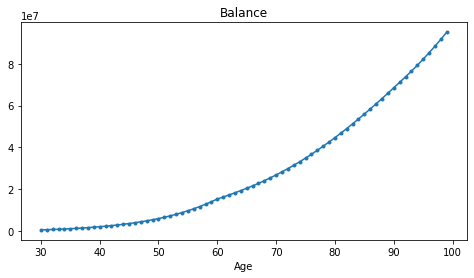

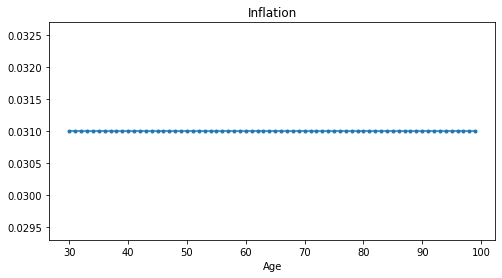

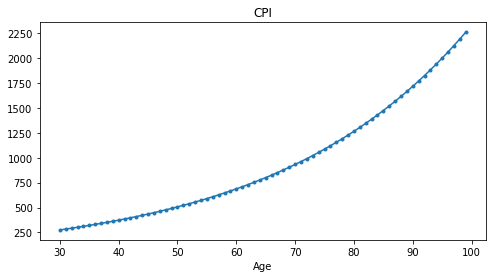

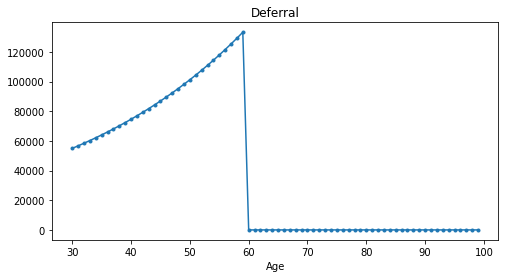

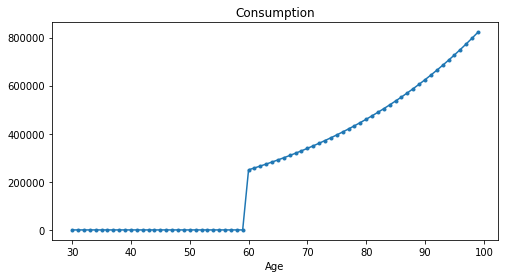

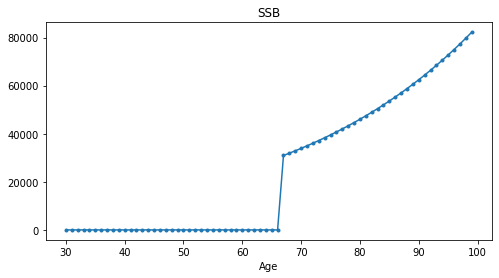

In [22]:
retirement_analysis.plot()

In [607]:
** ADD ALL OF THIS STUFF TO THE UNIT TEST FOR TEST_RETIREMENT_ANALYSIS.PY

SyntaxError: invalid syntax (4079605892.py, line 1)

In [569]:
ind = 0
print(retirement_analysis.portfolio.history[ind])
print(retirement_analysis.target_consumption_scenario.history[ind])
print(retirement_analysis.deferral_scenario.history[ind])

400000.0
0.0
30000.0


In [570]:
ind = 1
print(retirement_analysis.portfolio.history[ind])
print(retirement_analysis.target_consumption_scenario.history[ind])
print(retirement_analysis.deferral_scenario.history[ind])

457439.6243999999
0.0
30600.0


In [571]:
ret = retirement_analysis.portfolio.total_returns[0]

In [572]:
(400000 + 30000) * (1 + ret)

457439.6243999999

In [573]:
ind = retirement_analysis.ind_at_ret-2
print(retirement_analysis.portfolio.history[ind])
print(retirement_analysis.target_consumption_scenario.history[ind])
print(retirement_analysis.deferral_scenario.history[ind])

5093465.514696242
0.0
52230.72618521784


In [574]:
ind = retirement_analysis.ind_at_ret-1
print(retirement_analysis.portfolio.history[ind])
print(retirement_analysis.target_consumption_scenario.history[ind])
print(retirement_analysis.deferral_scenario.history[ind])

5456232.797134154
0.0
53275.340708922195


In [575]:
ind = retirement_analysis.ind_at_ret
print(retirement_analysis.portfolio.history[ind])
print(retirement_analysis.target_consumption_scenario.history[ind])
print(retirement_analysis.deferral_scenario.history[ind])

5835638.130043607
181136.15841033548
0.0


In [576]:
ind = retirement_analysis.ind_at_ret+1
print(retirement_analysis.portfolio.history[ind])
print(retirement_analysis.target_consumption_scenario.history[ind])
print(retirement_analysis.deferral_scenario.history[ind])

5982685.126971423
184758.88157854218
0.0


In [602]:
ind = retirement_analysis.ind_at_ret+10
print(retirement_analysis.portfolio.history[ind])
print(retirement_analysis.target_consumption_scenario.history[ind])
print(retirement_analysis.deferral_scenario.history[ind])

7125336.985168107
220803.96636148536
0.0


In [603]:
cons = retirement_analysis.target_consumption_scenario.history[ind]
ssb = retirement_analysis.ssb_scenario.history[ind]
withdrawal = cons - ssb
ret = retirement_analysis.portfolio.total_returns[ind]
ret = sum(np.array(retirement_analysis.portfolio.glidepath[ind]) * \
          np.array([geo_mean_equity_return, geo_mean_bond_return, geo_mean_cash_return]))

(retirement_analysis.portfolio.history[ind] - withdrawal) * (1 + ret)

7246825.1984947305

In [604]:
ind = retirement_analysis.ind_at_ret+11
print(retirement_analysis.portfolio.history[ind])
print(retirement_analysis.target_consumption_scenario.history[ind])
print(retirement_analysis.deferral_scenario.history[ind])

7246825.1984947305
225220.0456887151
0.0


5964076.955177684

0.05803926799999996

5982685.126971423

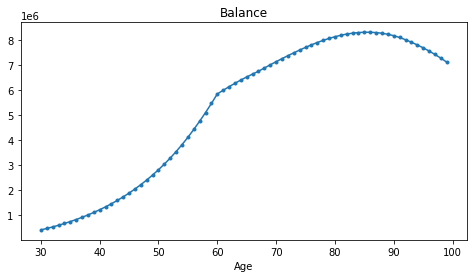

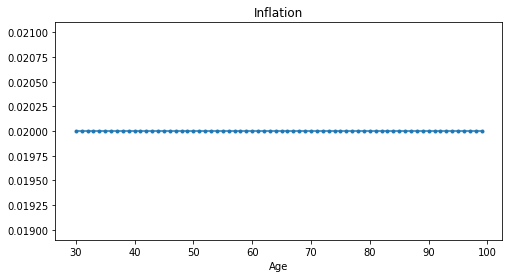

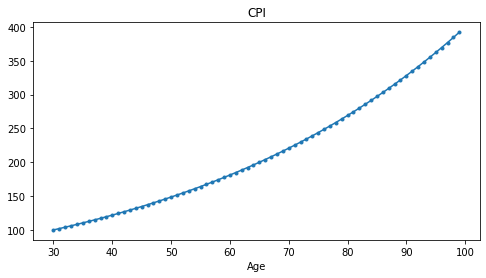

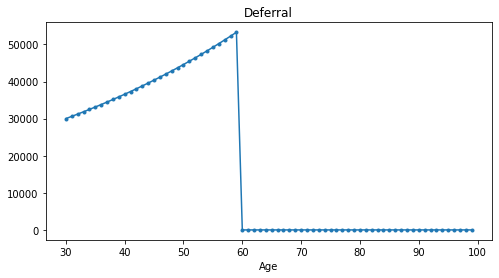

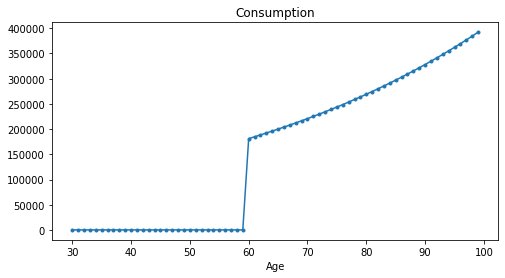

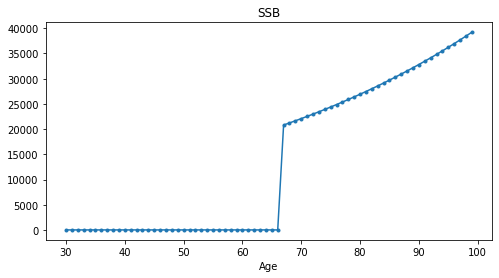

In [605]:
retirement_analysis.plot()